In [2]:
%matplotlib inline
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# Now load IRIS data
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [59]:
x.shape

(150, 4)

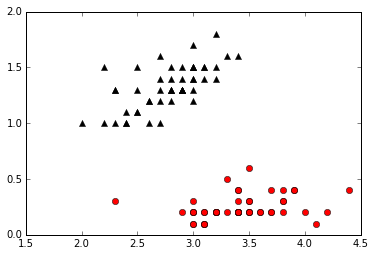

In [87]:
# Select two of the three labels
y1,y2 = 0,1
I1 = (y==y1)
I2 = (y==y2)
I = I1 + I2
n = sum(I)
x = x[I,:]
y = y[I]
# Now select two of the four features and plot them
I1 = (y==y1)
I2 = (y==y2)
f1,f2 = 1,3
features = [f1,f2]
plt.plot(x[I1,f1], x[I1,f2], 'ro')
plt.plot(x[I2,f1], x[I2,f2], 'k^')
x_min, x_max = 1.5, 4.5
y_min, y_max = 0.0, 2.0
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

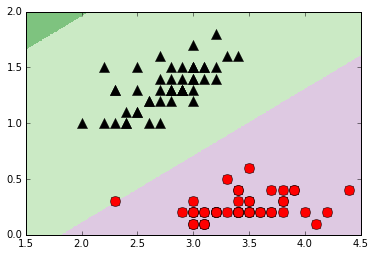

In [97]:
# Now train SVM
clf = SVC(kernel='linear', C=0.01)
clf.fit(x[:,features],y)
sv = np.zeros(n,dtype=bool)
sv[clf.support_] = True
notsv = np.logical_not(sv)
# Create mesh for plot
delta = 0.005
x_min, x_max = 1.5, 4.5
y_min, y_max = 0.0, 2.0
xx, yy = np.meshgrid(np.arange(x_min, x_max, delta), np.arange(y_min, y_max, delta))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
for i in range(len(Z)):
    Z[i] = min(Z[i],1.0)
    Z[i] = max(Z[i],-1.0)
    if (Z[i] > 0.0) and (Z[i] < 1.0):
        Z[i] = 0.5
    if (Z[i] < 0.0) and (Z[i] > -1.0):
        Z[i] = -0.5
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)

# Plot also the training points
plt.plot(x[(y==y1)*notsv,f1], x[(y==y1)*notsv,f2], 'ro')
plt.plot(x[(y==y1)*sv,f1], x[(y==y1)*sv,f2], 'ro', markersize=10)
plt.plot(x[(y==y2)*notsv,f1], x[(y==y2)*notsv,f2], 'k^')
plt.plot(x[(y==y2)*sv,f1], x[(y==y2)*sv,f2], 'k^', markersize=10)
#plt.xlabel('Alcohol level', fontsize=14, color='red')
#plt.ylabel('Hue', fontsize=14, color='red')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()